<a href="https://colab.research.google.com/github/YuehMintTai/RPython/blob/main/Class07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#三軍總醫院北投分院統計及實驗設計課程之七
## 2021/7/9
## ytai1123@gmail.com
### 使用方法:


1.   使用gmail帳號登入
2.   按"執行階段" -->"全部執行" 以執行全部內容, 若要個別執行可點選每格程式左方箭頭或按 Control + Enter 鍵執行。

In [1]:
##0-1
!git clone https://github.com/YuehMintTai/RPython.git

Cloning into 'RPython'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 77 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (77/77), done.


In [2]:
##0-2
!pip install rpy2

In [3]:
##0-3
%load_ext rpy2.ipython

In [4]:
##6-1
%%R
myData<-read.csv('RPython/samples.csv')
tail(myData,1)

    SID 性別 年齡 入伍前職業 教育程度 婚姻狀況 皆無過去病史01 早產兒01
188   4    1   25         商        4        1              1        0
    頭部曾受傷01 發展遲緩01 注意力不足過動症01 癲癇01 癲癇服藥治療 癲癇服藥期間
188            0          0                  0      0            0            0
    軍種 軍階 役別 入伍至今_年 聽過自殺課程_次 求助心輔_次 求助精神科_次
188    1    1    2         0.5               1           0             2
    使用1995_次 使用24h專線_次 特殊狀況 父母婚姻狀態 自殺意念_bsrs6 B型肝炎01
188           0              0        4            4              4         0
    C型肝炎01 氣喘史01 過敏史01 心臟病史01 高血壓01 醣尿病01 甲狀腺01 類風濕01
188         0        1        1          0        0        0        1        0
    重大意外01 自殺意念01 透露父母 透露手足 透露好友 透露同儕 透露長官 透露心輔
188          1          1        0        0        0        0        0        0
    透露醫師 拒告父母 拒告手足 拒告好友 拒告同儕 拒告長官 拒告心輔 拒告醫師
188        0        1        1        1        1        1        1        1
    BSRS總分 BSRSR總分 過動症總分 Inattention Impulsivity opposition depression
188       20         5         18           9           

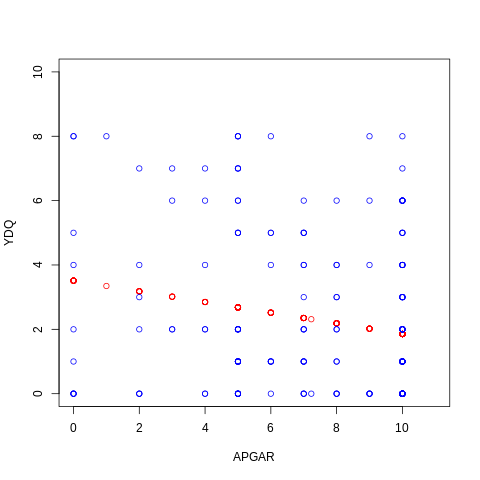

In [5]:
##7-1-1 繪出預測值(predicted_value)和實際值的關係圖
%%R
formula1<-'網路成癮分數YDQ~家庭滿意度apgar'
model1<-glm(formula1,myData,family='gaussian')
predicted_value1<-predict(model1,myData)
predicted_value1
plot(myData$家庭滿意度apgar,predicted_value1,col='red',
     xlab='APGAR',ylab='YDQ',
     xlim=range(c(0,11)),ylim=range(c(0,10)))
points(myData$家庭滿意度apgar, myData$網路成癮分數YDQ,col='blue')

In [6]:
%%R ##下載 rsq package
rm(list = ls())
install.packages('rsq')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lme4’, ‘Deriv’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/minqa_1.2.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 53548 bytes (52 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: 

In [7]:
##7-1-2 ##計算R-square
%%R
library(rsq)
print(rsq(model1))
print(rsq(model1,adj=TRUE))
with(summary(model1),1-deviance/null.deviance)

[1] 0.04158183
[1] 0.03642905
[1] 0.04158183


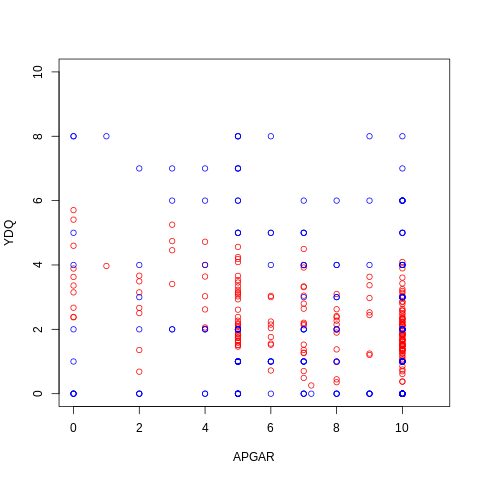

In [8]:
##7-2-2 ##使用較多X的model...
%%R
formula2<-'網路成癮分數YDQ~as.factor(性別)+家庭滿意度apgar+年齡+BSRS總分+anxiety+depression+burdensome+belonging'
model2<-glm(formula2, myData, family='gaussian')
predicted_value2<-predict(model2,myData)
plot(myData$家庭滿意度apgar,predicted_value2,col='red',
     xlab='APGAR',ylab='YDQ',
     xlim=range(c(0,11)),ylim=range(c(0,10)))
points(myData$家庭滿意度apgar, myData$網路成癮分數YDQ,col='blue')

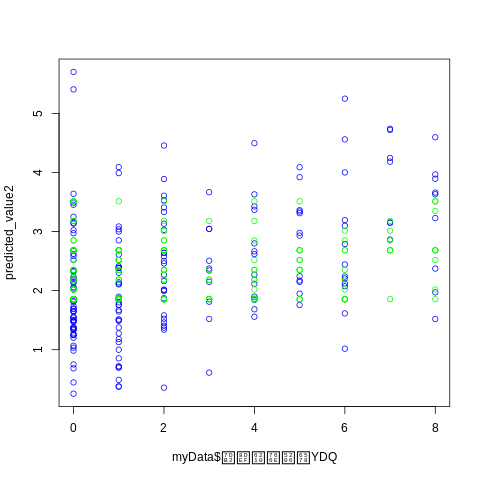

In [9]:
%%R
plot(myData$網路成癮分數YDQ,predicted_value2,col='blue')
points(myData$網路成癮分數YDQ,predicted_value1,col='green')

In [10]:
##7-2-2 ##計算R-square
%%R
library(rsq)
print(rsq(model2))
print(rsq(model2,adj=TRUE))
with(summary(model2),1-deviance/null.deviance)

[1] 0.1879277
[1] 0.1516339
[1] 0.1879277


In [11]:
##7-3 Python statsmodels predicting & R^2
import pandas as pd
import statsmodels.formula.api as smf
formula='網路成癮分數YDQ~家庭滿意度apgar'
df=pd.read_csv('RPython/samples.csv')
model3=smf.ols(formula,df).fit()
#model3=smf.glm(formula,df).fit()
#predicted_value=model3.predict(df.家庭滿意度apgar)
#predicted_value
model3.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              網路成癮分數YDQ   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.070
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00500
Time:                        00:06:54   Log-Likelihood:                -431.90
No. Observations:                 188   AIC:                             867.8
Df Residuals:                     186   BIC:                             874.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5125      0.457      7.679      0.000       2.610       4.415
家庭滿意度apgar    -0.1658      0.058     -2.841      0.005      -0.281      -0.051
==============================================================================
Omnibus:                       19.880   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.495
Skew:                           0.786   Prob(JB):                     2.15e-05
Kurtosis:                       2.480   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
##7-4-1 Python sklearn predicting and R^2

from sklearn.linear_model import LinearRegression
model4=LinearRegression()
x=df['家庭滿意度apgar']
model4.fit(x.values.reshape(-1,1),df['網路成癮分數YDQ'].values.tolist()) ##fit(x,y)
predicted_value=model4.predict(df['家庭滿意度apgar'].values.reshape(-1,1))
R2=model4.score(df['家庭滿意度apgar'].values.reshape(-1,1),df['網路成癮分數YDQ'].values.tolist())
N_y=len(df['網路成癮分數YDQ'])
AdjR2=1-(1-R2)*(N_y-1)/(N_y-x.values.reshape(-1,1).shape[1]-1)
print(R2)
AdjR2

0.04158183160640083


0.03642904575482231

In [13]:
##7-4-2 Calculate adjusted R^2 in sklearn...
from sklearn.metrics import r2_score
print(r2_score(df['網路成癮分數YDQ'], predicted_value))
r2_score(df['網路成癮分數YDQ'],predicted_value, multioutput='raw_values' )

0.04158183160640083


array([0.04158183])

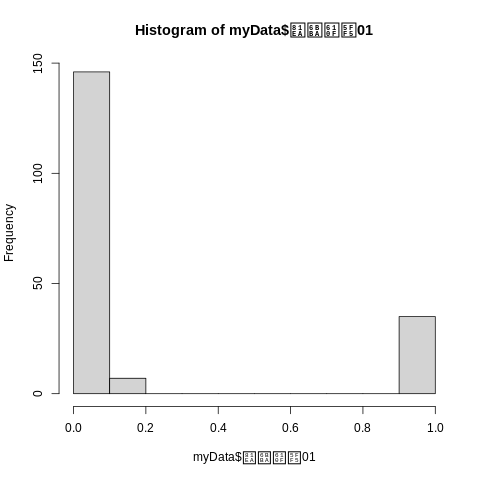

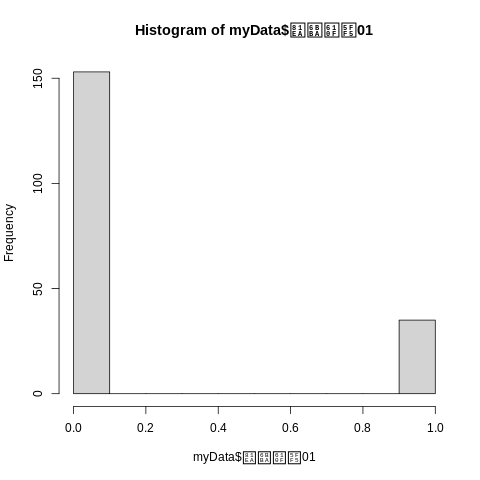

In [14]:
%%R
hist(myData$自殺意念01)
myData$自殺意念01<-as.integer(myData$自殺意念01)
hist(myData$自殺意念01)

In [15]:
##7-5-1 Predicting probability from logistic regression model
%%R
formula<-'自殺意念01~as.factor(性別)+網路成癮分數YDQ+家庭滿意度apgar'
model5<-glm(formula,myData, family='binomial')
summary(model5)
預測機率1<-predict(model5,type="response")
預測機率1[1:20]

         1          2          3          4          5          6          7 
0.05973068 0.06517669 0.08090854 0.05973068 0.05531099 0.05531099 0.23784212 
         8          9         10         11         12         13         14 
0.05120053 0.05120053 0.05120053 0.05120053 0.12122299 0.05176214 0.16949776 
        15         16         17         18         19         20 
0.05120053 0.22191810 0.25294191 0.07012439 0.12837035 0.05120053 


In [ ]:
%%R
install.packages('pROC')

R[write to console]: Type 'citation("pROC")' for a citation.

R[write to console]: 
Attaching package: ‘pROC’


R[write to console]: The following objects are masked from ‘package:stats’:

    cov, smooth, var


R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases



  |======================================================================| 100%


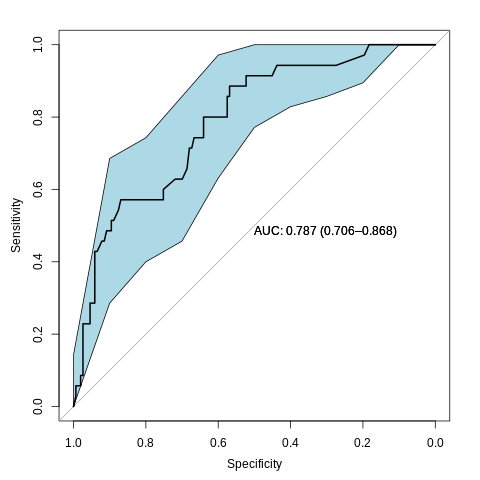

In [17]:
##7-5-2 Another way to predicting probability 
%%R
library(pROC)
pROC_obj<-roc(myData$自殺意念01,預測機率1, smoothed=TRUE, print.auc=TRUE, ci=TRUE,ci.alpha=0.9,plot=TRUE)
myROC.ci<-ci.se(pROC_obj)
plot(myROC.ci, type='shape',col='lightblue')

In [18]:
##7-5-3 Comparing two roc curves
%%R
formula<-'自殺意念01~as.factor(性別)+網路成癮分數YDQ+家庭滿意度apgar+depression+anxiety+belonging+burdensome'
model6<-glm(formula,myData, family='binomial')
summary(model6)
預測機率2<-predict(model6,type="response")
預測機率2[1:20]
roc1<-roc(myData$自殺意念01,預測機率1)
roc2<-roc(myData$自殺意念01,預測機率2)
roc.test(roc1,roc2)

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases

R[write to console]: Setting levels: control = 0, case = 1

R[write to console]: Setting direction: controls < cases




	DeLong's test for two correlated ROC curves

data:  roc1 and roc2
Z = -3.558, p-value = 0.0003737
alternative hypothesis: true difference in AUC is not equal to 0
sample estimates:
AUC of roc1 AUC of roc2 
  0.7872082   0.8976657 



In [ ]:
%%R
install.packages('InformationValue')

In [27]:
##7-6-1 Confusion Table, sensitivity and specificity
%%R
library(InformationValue)
預測機率1<-predict(model5,myData,type='response')
optimal<-optimalCutoff(myData$自殺意念01,預測機率1)[1]
confusionMatrix(myData$自殺意念01,預測機率1)         ##    0  1
                               ##  0 147 27
                               ##  1  6  8
#confusionMatrix(myData$自殺意念01,預測機率2,threshold=optimal)##    0  1
                               ##  0  140 9
                               ##  1  13 26
#sensitivity(myData$自殺意念01,預測機率2,threshold=optimal)  ##0.7428571
#specificity(myData$自殺意念01,預測機率2,threshold=optimal)  ##0.9150327
#specificity(myData$自殺意念01,預測機率2,threshold=0.5)   ##0.9411765
#specificity(myData$自殺意念01,預測機率2)          ##0.9411765
#optimal                           ##0.366444

    0  1
0 147 27
1   6  8
